In [6]:
%pip install pandas
%pip install numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importar bibliotecas necesarias
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time

In [8]:
# Carga del Conjunto de Datos MNIST
print("Cargando el conjunto de datos MNIST...")
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist["data"], mnist["target"]

Cargando el conjunto de datos MNIST...


In [9]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [10]:
# Entrenamiento sin PCA (Random Forest)
print("\nEntrenando el clasificador de Random Forest sin PCA...")
start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
training_time_without_pca_rf = time.time() - start_time


Entrenando el clasificador de Random Forest sin PCA...


In [11]:
# Evaluar el rendimiento
y_pred_rf = rf_classifier.predict(X_test)
accuracy_without_pca_rf = accuracy_score(y_test, y_pred_rf)
precision_without_pca_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_without_pca_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_without_pca_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [12]:
# Aplicar PCA
print("\nAplicando PCA...")
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
n_dimensions_after_pca = X_train_reduced.shape[1]
print("Número de dimensiones después de aplicar PCA:", n_dimensions_after_pca)


Aplicando PCA...
Número de dimensiones después de aplicar PCA: 154


In [13]:
# Entrenamiento con PCA (Random Forest)
print("\nEntrenando el clasificador de Random Forest con PCA...")
start_time = time.time()
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_reduced, y_train)
training_time_with_pca_rf = time.time() - start_time


Entrenando el clasificador de Random Forest con PCA...


In [14]:
# Evaluar el rendimiento
y_pred_rf_pca = rf_classifier_pca.predict(X_test_reduced)
accuracy_with_pca_rf = accuracy_score(y_test, y_pred_rf_pca)
precision_with_pca_rf = precision_score(y_test, y_pred_rf_pca, average='weighted')
recall_with_pca_rf = recall_score(y_test, y_pred_rf_pca, average='weighted')
f1_with_pca_rf = f1_score(y_test, y_pred_rf_pca, average='weighted')

In [15]:
# Experimentación con SGDClassifier
print("\nEntrenando el clasificador SGDClassifier sin PCA...")
start_time = time.time()
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)
training_time_without_pca_sgd = time.time() - start_time


Entrenando el clasificador SGDClassifier sin PCA...


In [16]:
# Evaluar el rendimiento
y_pred_sgd = sgd_classifier.predict(X_test)
accuracy_without_pca_sgd = accuracy_score(y_test, y_pred_sgd)
precision_without_pca_sgd = precision_score(y_test, y_pred_sgd, average='weighted')
recall_without_pca_sgd = recall_score(y_test, y_pred_sgd, average='weighted')
f1_without_pca_sgd = f1_score(y_test, y_pred_sgd, average='weighted')

print("\nEntrenando el clasificador SGDClassifier con PCA...")
start_time = time.time()
sgd_classifier_pca = SGDClassifier(random_state=42)
sgd_classifier_pca.fit(X_train_reduced, y_train)
training_time_with_pca_sgd = time.time() - start_time


Entrenando el clasificador SGDClassifier con PCA...


In [17]:
# Evaluar el rendimiento
y_pred_sgd_pca = sgd_classifier_pca.predict(X_test_reduced)
accuracy_with_pca_sgd = accuracy_score(y_test, y_pred_sgd_pca)
precision_with_pca_sgd = precision_score(y_test, y_pred_sgd_pca, average='weighted')
recall_with_pca_sgd = recall_score(y_test, y_pred_sgd_pca, average='weighted')
f1_with_pca_sgd = f1_score(y_test, y_pred_sgd_pca, average='weighted')

# Tiempo de entrenamiento y métricas de rendimiento para Random Forest sin PCA
tiempo_entrenamiento_rf_sin_pca = training_time_without_pca_rf
precision_rf_sin_pca = precision_without_pca_rf
recall_rf_sin_pca = recall_without_pca_rf
f1_rf_sin_pca = f1_without_pca_rf


In [18]:
print("\nResultados sin PCA:")
print("Tiempo de entrenamiento Random Forest:", training_time_without_pca_rf)
print("Precisión Random Forest:", precision_without_pca_rf)
print("Recall Random Forest:", recall_without_pca_rf)
print("F1-score Random Forest:", f1_without_pca_rf)
print("Tiempo de entrenamiento SGD:", training_time_without_pca_sgd)
print("Precisión SGD:", precision_without_pca_sgd)
print("Recall SGD:", recall_without_pca_sgd)
print("F1-score SGD:", f1_without_pca_sgd)

print("\nResultados con PCA:")
print("Tiempo de entrenamiento Random Forest con PCA:", training_time_with_pca_rf)
print("Precisión Random Forest con PCA:", precision_with_pca_rf)
print("Recall Random Forest con PCA:", recall_with_pca_rf)
print("F1-score Random Forest con PCA:", f1_with_pca_rf)
print("Tiempo de entrenamiento SGD con PCA:", training_time_with_pca_sgd)
print("Precisión SGD con PCA:", precision_with_pca_sgd)
print("Recall SGD con PCA:", recall_with_pca_sgd)
print("F1-score SGD con PCA:", f1_with_pca_sgd)


Resultados sin PCA:
Tiempo de entrenamiento Random Forest: 36.204214334487915
Precisión Random Forest: 0.967461553435888
Recall Random Forest: 0.9674
F1-score Random Forest: 0.9673902417224058
Tiempo de entrenamiento SGD: 110.47803711891174
Precisión SGD: 0.8808743380779044
Recall SGD: 0.8691
F1-score SGD: 0.8704644481216579

Resultados con PCA:
Tiempo de entrenamiento Random Forest con PCA: 98.71992707252502
Precisión Random Forest con PCA: 0.947024374648475
Recall Random Forest con PCA: 0.9469
F1-score Random Forest con PCA: 0.946850570914367
Tiempo de entrenamiento SGD con PCA: 21.84781002998352
Precisión SGD con PCA: 0.8908455428791405
Recall SGD con PCA: 0.8907
F1-score SGD con PCA: 0.8899004828267653


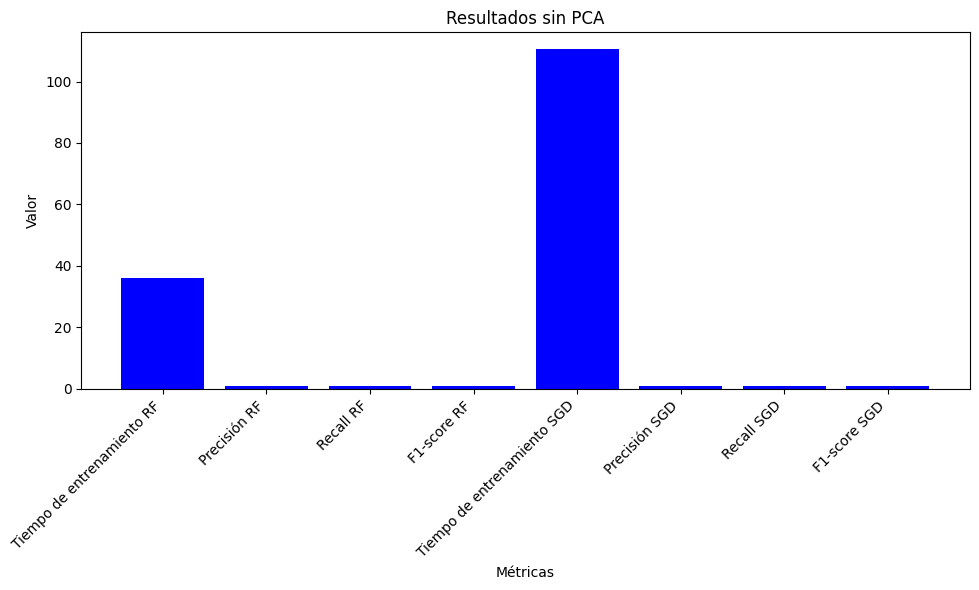

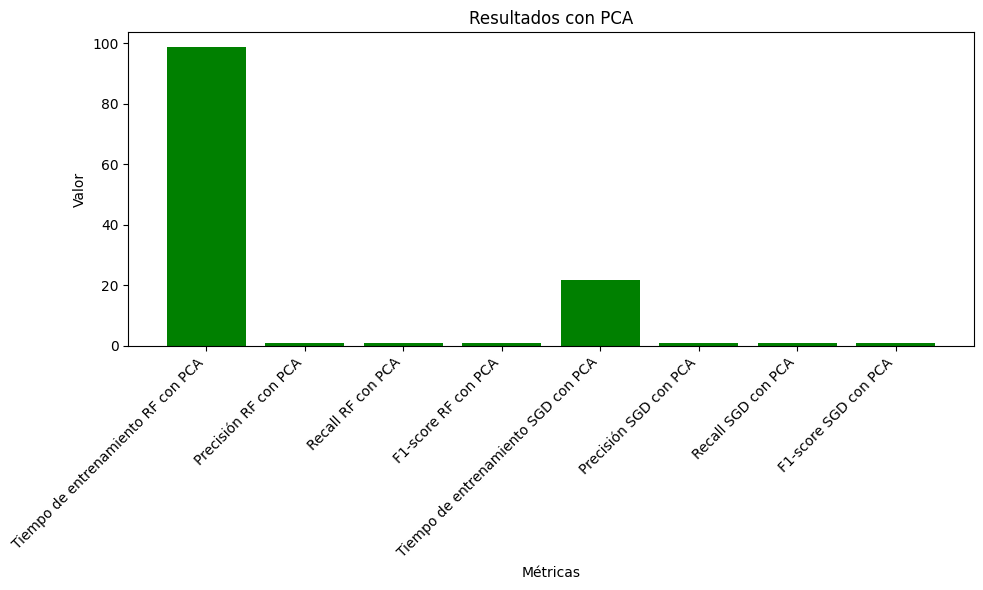

In [20]:
# Definir los nombres de las métricas y los valores correspondientes para los resultados sin PCA
metrics_without_pca = ['Tiempo de entrenamiento RF', 'Precisión RF', 'Recall RF', 'F1-score RF',
                       'Tiempo de entrenamiento SGD', 'Precisión SGD', 'Recall SGD', 'F1-score SGD']
values_without_pca = [training_time_without_pca_rf, precision_without_pca_rf, recall_without_pca_rf, f1_without_pca_rf,
                      training_time_without_pca_sgd, precision_without_pca_sgd, recall_without_pca_sgd, f1_without_pca_sgd]

# Definir los nombres de las métricas y los valores correspondientes para los resultados con PCA
metrics_with_pca = ['Tiempo de entrenamiento RF con PCA', 'Precisión RF con PCA', 'Recall RF con PCA', 'F1-score RF con PCA',
                    'Tiempo de entrenamiento SGD con PCA', 'Precisión SGD con PCA', 'Recall SGD con PCA', 'F1-score SGD con PCA']
values_with_pca = [training_time_with_pca_rf, precision_with_pca_rf, recall_with_pca_rf, f1_with_pca_rf,
                   training_time_with_pca_sgd, precision_with_pca_sgd, recall_with_pca_sgd, f1_with_pca_sgd]

# Crear un gráfico de barras para los resultados sin PCA
plt.figure(figsize=(10, 6))
plt.bar(metrics_without_pca, values_without_pca, color='blue')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Resultados sin PCA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crear un gráfico de barras para los resultados con PCA
plt.figure(figsize=(10, 6))
plt.bar(metrics_with_pca, values_with_pca, color='green')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Resultados con PCA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()